In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
env = gym.make(env_name)


seed = 0
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)


s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_mdp_", evaluate=True)
agent.policy.my_np_compile()

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
import importlib
import vi_base
importlib.reload(vi_base)

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "policy":agent.policy.my_np_select_action,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)


In [7]:
vi.get_real_rollout_mdppolicy_data()

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

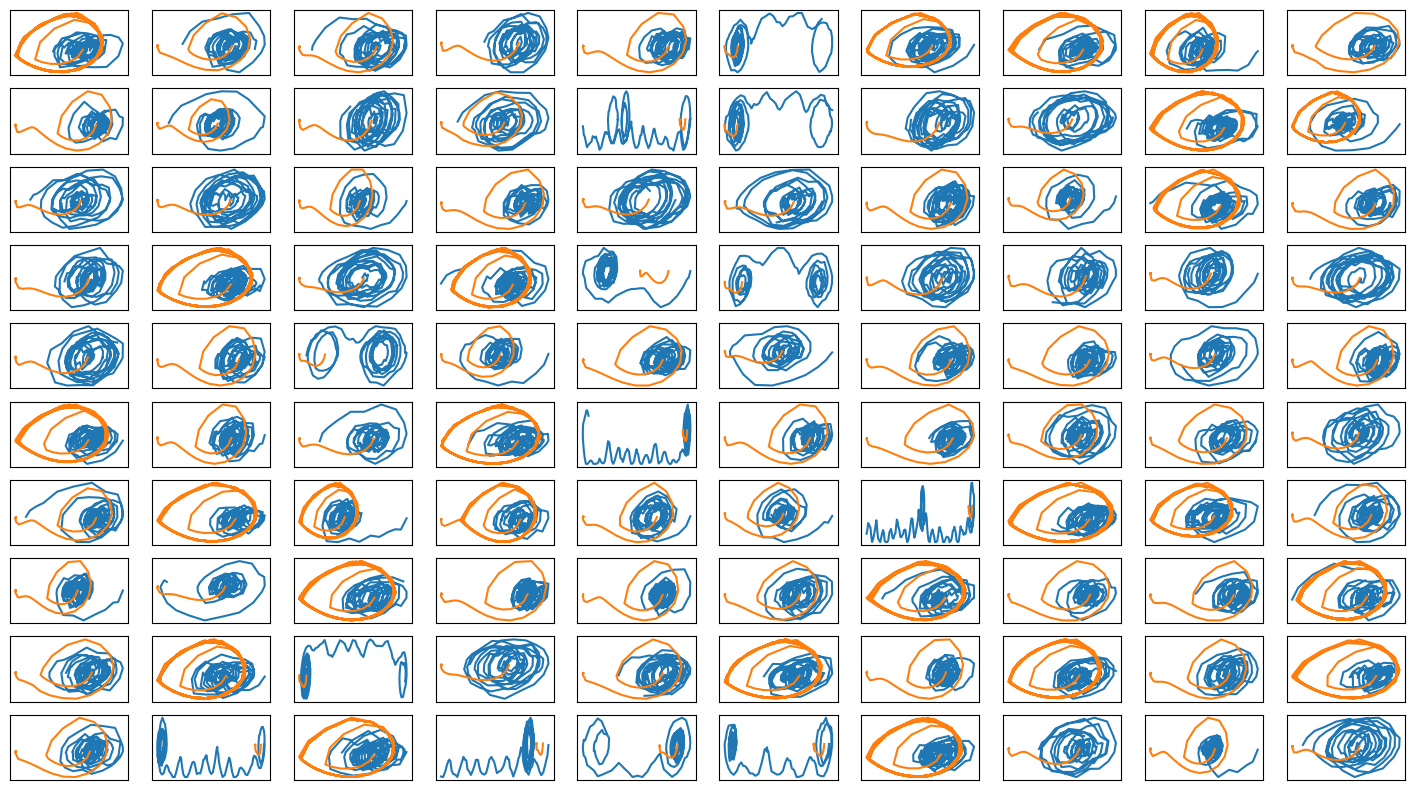

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

train_weighted_vae: enc_dec
train: iter 0  trainloss 7712.96026  validloss 1617.24579±0.00000  bestvalidloss 1617.24579  last_update 0
train: iter 1  trainloss 3396.39290  validloss 945.48231±0.00000  bestvalidloss 945.48231  last_update 0
train: iter 2  trainloss 582.15058  validloss 507.83198±0.00000  bestvalidloss 507.83198  last_update 0
train: iter 3  trainloss 596.00414  validloss 490.30696±0.00000  bestvalidloss 490.30696  last_update 0
train: iter 4  trainloss 523.57299  validloss 479.38626±0.00000  bestvalidloss 479.38626  last_update 0
train: iter 5  trainloss 517.59714  validloss 462.57794±0.00000  bestvalidloss 462.57794  last_update 0
train: iter 6  trainloss 477.55112  validloss 454.68661±0.00000  bestvalidloss 454.68661  last_update 0
train: iter 7  trainloss 495.30948  validloss 443.58442±0.00000  bestvalidloss 443.58442  last_update 0
train: iter 8  trainloss 460.00600  validloss 439.15971±0.00000  bestvalidloss 439.15971  last_update 0
train: iter 9  trainloss 447.321

train: iter 78  trainloss -320.60083  validloss -232.92898±0.00000  bestvalidloss -296.38529  last_update 2
train: iter 79  trainloss -351.58463  validloss -284.66757±0.00000  bestvalidloss -296.38529  last_update 3
train: iter 80  trainloss -365.67365  validloss -274.75402±0.00000  bestvalidloss -296.38529  last_update 4
train: iter 81  trainloss -373.07896  validloss -297.80668±0.00000  bestvalidloss -297.80668  last_update 0
train: iter 82  trainloss -378.74334  validloss -341.69614±0.00000  bestvalidloss -341.69614  last_update 0
train: iter 83  trainloss -228.02525  validloss -352.11053±0.00000  bestvalidloss -352.11053  last_update 0
train: iter 84  trainloss -304.18262  validloss 125.02492±0.00000  bestvalidloss -352.11053  last_update 1
train: iter 85  trainloss -356.62966  validloss -252.40587±0.00000  bestvalidloss -352.11053  last_update 2
train: iter 86  trainloss -376.57560  validloss -349.19686±0.00000  bestvalidloss -352.11053  last_update 3
train: iter 87  trainloss -38

train: iter 154  trainloss -616.34772  validloss -593.52365±0.00000  bestvalidloss -603.76537  last_update 5
train: iter 155  trainloss -637.62732  validloss -599.83505±0.00000  bestvalidloss -603.76537  last_update 6
train: iter 156  trainloss -632.43913  validloss -571.65316±0.00000  bestvalidloss -603.76537  last_update 7
train: iter 157  trainloss -641.77150  validloss -577.71174±0.00000  bestvalidloss -603.76537  last_update 8
train: iter 158  trainloss -584.52689  validloss -604.28664±0.00000  bestvalidloss -604.28664  last_update 0
train: iter 159  trainloss -620.63597  validloss -586.14107±0.00000  bestvalidloss -604.28664  last_update 1
train: iter 160  trainloss -623.11159  validloss -590.12408±0.00000  bestvalidloss -604.28664  last_update 2
train: iter 161  trainloss -647.25511  validloss -599.75123±0.00000  bestvalidloss -604.28664  last_update 3
train: iter 162  trainloss -627.19271  validloss -601.01866±0.00000  bestvalidloss -604.28664  last_update 4
train: iter 163  tr

train: iter 229  trainloss -635.24826  validloss -594.90220±0.00000  bestvalidloss -644.41211  last_update 28
train: iter 230  trainloss -646.99706  validloss -595.08222±0.00000  bestvalidloss -644.41211  last_update 29
train: iter 231  trainloss -654.24109  validloss -576.86625±0.00000  bestvalidloss -644.41211  last_update 30
train: iter 232  trainloss -650.98593  validloss -611.97001±0.00000  bestvalidloss -644.41211  last_update 31
train: iter 233  trainloss -650.73032  validloss -614.35476±0.00000  bestvalidloss -644.41211  last_update 32
train: iter 234  trainloss -631.43492  validloss -599.48325±0.00000  bestvalidloss -644.41211  last_update 33
train: iter 235  trainloss -623.27137  validloss -612.66261±0.00000  bestvalidloss -644.41211  last_update 34
train: iter 236  trainloss -652.97618  validloss -602.07649±0.00000  bestvalidloss -644.41211  last_update 35
train: iter 237  trainloss -658.79091  validloss -603.04037±0.00000  bestvalidloss -644.41211  last_update 36
train: ite

train: iter 304  trainloss -688.54097  validloss -629.80307±0.00000  bestvalidloss -655.77074  last_update 11
train: iter 305  trainloss -685.39797  validloss -642.42576±0.00000  bestvalidloss -655.77074  last_update 12
train: iter 306  trainloss -689.94091  validloss -637.83478±0.00000  bestvalidloss -655.77074  last_update 13
train: iter 307  trainloss -703.15907  validloss -615.23962±0.00000  bestvalidloss -655.77074  last_update 14
train: iter 308  trainloss -697.33662  validloss -629.49388±0.00000  bestvalidloss -655.77074  last_update 15
train: iter 309  trainloss -692.83690  validloss -607.30635±0.00000  bestvalidloss -655.77074  last_update 16
train: iter 310  trainloss -676.79191  validloss -649.90970±0.00000  bestvalidloss -655.77074  last_update 17
train: iter 311  trainloss -696.93289  validloss -637.79072±0.00000  bestvalidloss -655.77074  last_update 18
train: iter 312  trainloss -704.27149  validloss -636.32634±0.00000  bestvalidloss -655.77074  last_update 19
train: ite

train: iter 381  trainloss -707.09704  validloss -616.53842±0.00000  bestvalidloss -682.65160  last_update 2
train: iter 382  trainloss -717.01794  validloss -684.05225±0.00000  bestvalidloss -684.05225  last_update 0
train: iter 383  trainloss -710.01668  validloss -681.35100±0.00000  bestvalidloss -684.05225  last_update 1
train: iter 384  trainloss -715.42096  validloss -653.81986±0.00000  bestvalidloss -684.05225  last_update 2
train: iter 385  trainloss -714.75745  validloss -670.05453±0.00000  bestvalidloss -684.05225  last_update 3
train: iter 386  trainloss -683.79275  validloss -675.51852±0.00000  bestvalidloss -684.05225  last_update 4
train: iter 387  trainloss -681.45181  validloss -635.17667±0.00000  bestvalidloss -684.05225  last_update 5
train: iter 388  trainloss -703.23295  validloss -673.12755±0.00000  bestvalidloss -684.05225  last_update 6
train: iter 389  trainloss -696.03208  validloss -652.93114±0.00000  bestvalidloss -684.05225  last_update 7
train: iter 390  tr

train: iter 456  trainloss -710.86342  validloss -673.25605±0.00000  bestvalidloss -684.05225  last_update 74
train: iter 457  trainloss -708.58205  validloss -679.28553±0.00000  bestvalidloss -684.05225  last_update 75
train: iter 458  trainloss -704.30544  validloss -623.97877±0.00000  bestvalidloss -684.05225  last_update 76
train: iter 459  trainloss -669.39716  validloss -655.45036±0.00000  bestvalidloss -684.05225  last_update 77
train: iter 460  trainloss -719.13104  validloss -670.00446±0.00000  bestvalidloss -684.05225  last_update 78
train: iter 461  trainloss -721.59119  validloss -602.75490±0.00000  bestvalidloss -684.05225  last_update 79
train: iter 462  trainloss -716.69613  validloss -660.33390±0.00000  bestvalidloss -684.05225  last_update 80
train: iter 463  trainloss -715.73330  validloss -654.53024±0.00000  bestvalidloss -684.05225  last_update 81
train: iter 464  trainloss -737.34321  validloss -670.95874±0.00000  bestvalidloss -684.05225  last_update 82
train: ite

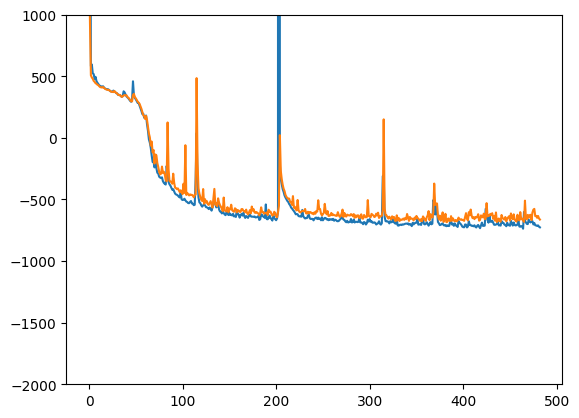

train_weighted_vae: enc
train: iter 0  trainloss -698.23251  validloss -683.60017±0.00000  bestvalidloss -683.60017  last_update 0
train: iter 1  trainloss -726.78629  validloss -682.34525±0.00000  bestvalidloss -683.60017  last_update 1
train: iter 2  trainloss -659.78037  validloss -670.47042±0.00000  bestvalidloss -683.60017  last_update 2
train: iter 3  trainloss -708.27365  validloss -598.71749±0.00000  bestvalidloss -683.60017  last_update 3
train: iter 4  trainloss -716.71741  validloss -663.45345±0.00000  bestvalidloss -683.60017  last_update 4
train: iter 5  trainloss -714.22598  validloss -674.42244±0.00000  bestvalidloss -683.60017  last_update 5
train: iter 6  trainloss -701.12911  validloss -563.36843±0.00000  bestvalidloss -683.60017  last_update 6
train: iter 7  trainloss -594.42661  validloss -677.88697±0.00000  bestvalidloss -683.60017  last_update 7
train: iter 8  trainloss -713.44719  validloss -641.99201±0.00000  bestvalidloss -683.60017  last_update 8
train: iter 9

train: iter 76  trainloss -717.96027  validloss -672.01562±0.00000  bestvalidloss -683.60017  last_update 76
train: iter 77  trainloss -725.64455  validloss -662.99981±0.00000  bestvalidloss -683.60017  last_update 77
train: iter 78  trainloss -727.28264  validloss -681.27655±0.00000  bestvalidloss -683.60017  last_update 78
train: iter 79  trainloss -722.57858  validloss -684.12701±0.00000  bestvalidloss -684.12701  last_update 0
train: iter 80  trainloss -727.17511  validloss -683.42113±0.00000  bestvalidloss -684.12701  last_update 1
train: iter 81  trainloss -725.38971  validloss -684.11322±0.00000  bestvalidloss -684.12701  last_update 2
train: iter 82  trainloss -722.30164  validloss -668.73216±0.00000  bestvalidloss -684.12701  last_update 3
train: iter 83  trainloss -702.69316  validloss -676.32546±0.00000  bestvalidloss -684.12701  last_update 4
train: iter 84  trainloss -721.68884  validloss -679.40155±0.00000  bestvalidloss -684.12701  last_update 5
train: iter 85  trainloss

train: iter 152  trainloss -726.93659  validloss -665.03332±0.00000  bestvalidloss -685.49974  last_update 21
train: iter 153  trainloss -723.11650  validloss -675.24634±0.00000  bestvalidloss -685.49974  last_update 22
train: iter 154  trainloss -732.90496  validloss -671.66815±0.00000  bestvalidloss -685.49974  last_update 23
train: iter 155  trainloss -718.45669  validloss -671.80627±0.00000  bestvalidloss -685.49974  last_update 24
train: iter 156  trainloss -720.29293  validloss -648.87483±0.00000  bestvalidloss -685.49974  last_update 25
train: iter 157  trainloss -730.69550  validloss -665.38808±0.00000  bestvalidloss -685.49974  last_update 26
train: iter 158  trainloss -724.63595  validloss -676.25261±0.00000  bestvalidloss -685.49974  last_update 27
train: iter 159  trainloss -729.92644  validloss -670.26164±0.00000  bestvalidloss -685.49974  last_update 28
train: iter 160  trainloss -729.15406  validloss -667.41235±0.00000  bestvalidloss -685.49974  last_update 29
train: ite

train: iter 227  trainloss -721.27846  validloss -632.44214±0.00000  bestvalidloss -685.49974  last_update 96
train: iter 228  trainloss -733.80724  validloss -668.14254±0.00000  bestvalidloss -685.49974  last_update 97
train: iter 229  trainloss -731.69018  validloss -676.64866±0.00000  bestvalidloss -685.49974  last_update 98
train: iter 230  trainloss -726.83970  validloss -678.48738±0.00000  bestvalidloss -685.49974  last_update 99
train: iter 231  trainloss -727.33025  validloss -659.98959±0.00000  bestvalidloss -685.49974  last_update 100
train: fin
train_weighted_vae: dec
train: iter 0  trainloss -712.91904  validloss -682.08188±0.00000  bestvalidloss -682.08188  last_update 0
train: iter 1  trainloss -717.43596  validloss -674.25678±0.00000  bestvalidloss -682.08188  last_update 1
train: iter 2  trainloss -723.57166  validloss -682.41701±0.00000  bestvalidloss -682.41701  last_update 0
train: iter 3  trainloss -729.45559  validloss -680.23384±0.00000  bestvalidloss -682.41701  

train: iter 72  trainloss -745.73306  validloss -694.10481±0.00000  bestvalidloss -701.53234  last_update 8
train: iter 73  trainloss -724.54250  validloss -677.26761±0.00000  bestvalidloss -701.53234  last_update 9
train: iter 74  trainloss -739.03211  validloss -696.63465±0.00000  bestvalidloss -701.53234  last_update 10
train: iter 75  trainloss -739.47118  validloss -690.75655±0.00000  bestvalidloss -701.53234  last_update 11
train: iter 76  trainloss -733.74858  validloss -681.86454±0.00000  bestvalidloss -701.53234  last_update 12
train: iter 77  trainloss -726.11712  validloss -690.48467±0.00000  bestvalidloss -701.53234  last_update 13
train: iter 78  trainloss -726.99565  validloss -684.86575±0.00000  bestvalidloss -701.53234  last_update 14
train: iter 79  trainloss -724.58676  validloss -674.57158±0.00000  bestvalidloss -701.53234  last_update 15
train: iter 80  trainloss -720.15249  validloss -689.96185±0.00000  bestvalidloss -701.53234  last_update 16
train: iter 81  train

train: iter 147  trainloss -740.70850  validloss -672.75721±0.00000  bestvalidloss -707.71417  last_update 23
train: iter 148  trainloss -742.03058  validloss -700.54087±0.00000  bestvalidloss -707.71417  last_update 24
train: iter 149  trainloss -748.41377  validloss -705.02558±0.00000  bestvalidloss -707.71417  last_update 25
train: iter 150  trainloss -735.34062  validloss -694.11751±0.00000  bestvalidloss -707.71417  last_update 26
train: iter 151  trainloss -738.71359  validloss -699.21731±0.00000  bestvalidloss -707.71417  last_update 27
train: iter 152  trainloss -750.38545  validloss -700.09901±0.00000  bestvalidloss -707.71417  last_update 28
train: iter 153  trainloss -748.07167  validloss -659.47120±0.00000  bestvalidloss -707.71417  last_update 29
train: iter 154  trainloss -733.85481  validloss -688.32766±0.00000  bestvalidloss -707.71417  last_update 30
train: iter 155  trainloss -736.42209  validloss -668.76244±0.00000  bestvalidloss -707.71417  last_update 31
train: ite

train: iter 222  trainloss -748.26672  validloss -672.58595±0.00000  bestvalidloss -708.50467  last_update 31
train: iter 223  trainloss -739.45954  validloss -683.57691±0.00000  bestvalidloss -708.50467  last_update 32
train: iter 224  trainloss -740.82696  validloss -686.69499±0.00000  bestvalidloss -708.50467  last_update 33
train: iter 225  trainloss -749.21393  validloss -686.15962±0.00000  bestvalidloss -708.50467  last_update 34
train: iter 226  trainloss -748.29694  validloss -700.70801±0.00000  bestvalidloss -708.50467  last_update 35
train: iter 227  trainloss -749.26186  validloss -694.05461±0.00000  bestvalidloss -708.50467  last_update 36
train: iter 228  trainloss -726.69662  validloss -637.88753±0.00000  bestvalidloss -708.50467  last_update 37
train: iter 229  trainloss -752.56799  validloss -680.71599±0.00000  bestvalidloss -708.50467  last_update 38
train: iter 230  trainloss -749.19906  validloss -678.04611±0.00000  bestvalidloss -708.50467  last_update 39
train: ite

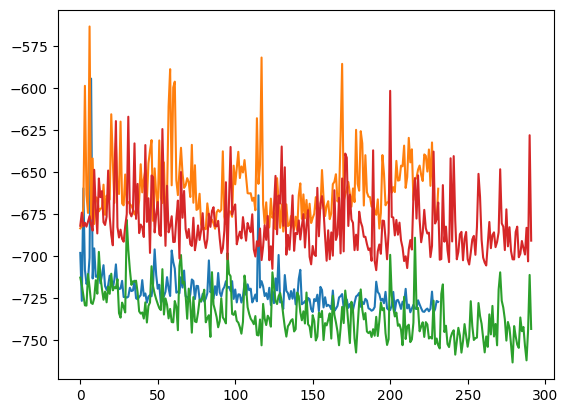

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()

vi.save()


In [10]:
vi.load()
vi.update_mulogvar_offlinedata()

load vi_base_ckpt


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  predict diverge [   6.39306052 -302.05918414]
16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  predict diverge [    1.31308491 -1276.36635091]
36  37  38  39  40  41  42  predict diverge [7.54820750e+00 8.27592952e+03]
43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  predict diverge [   6.46835321 -494.59832257]
6  7  8  9  10  11  12  13  14  15  predict diverge [ 1.13560219e+01 -4.67669430e+05]
16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  predict diverge [   8.17746855 -694.75277994]
36  37  38  39  40  41  42  predict diverge [7.24748344e+00 1.11986445e+06]
43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71

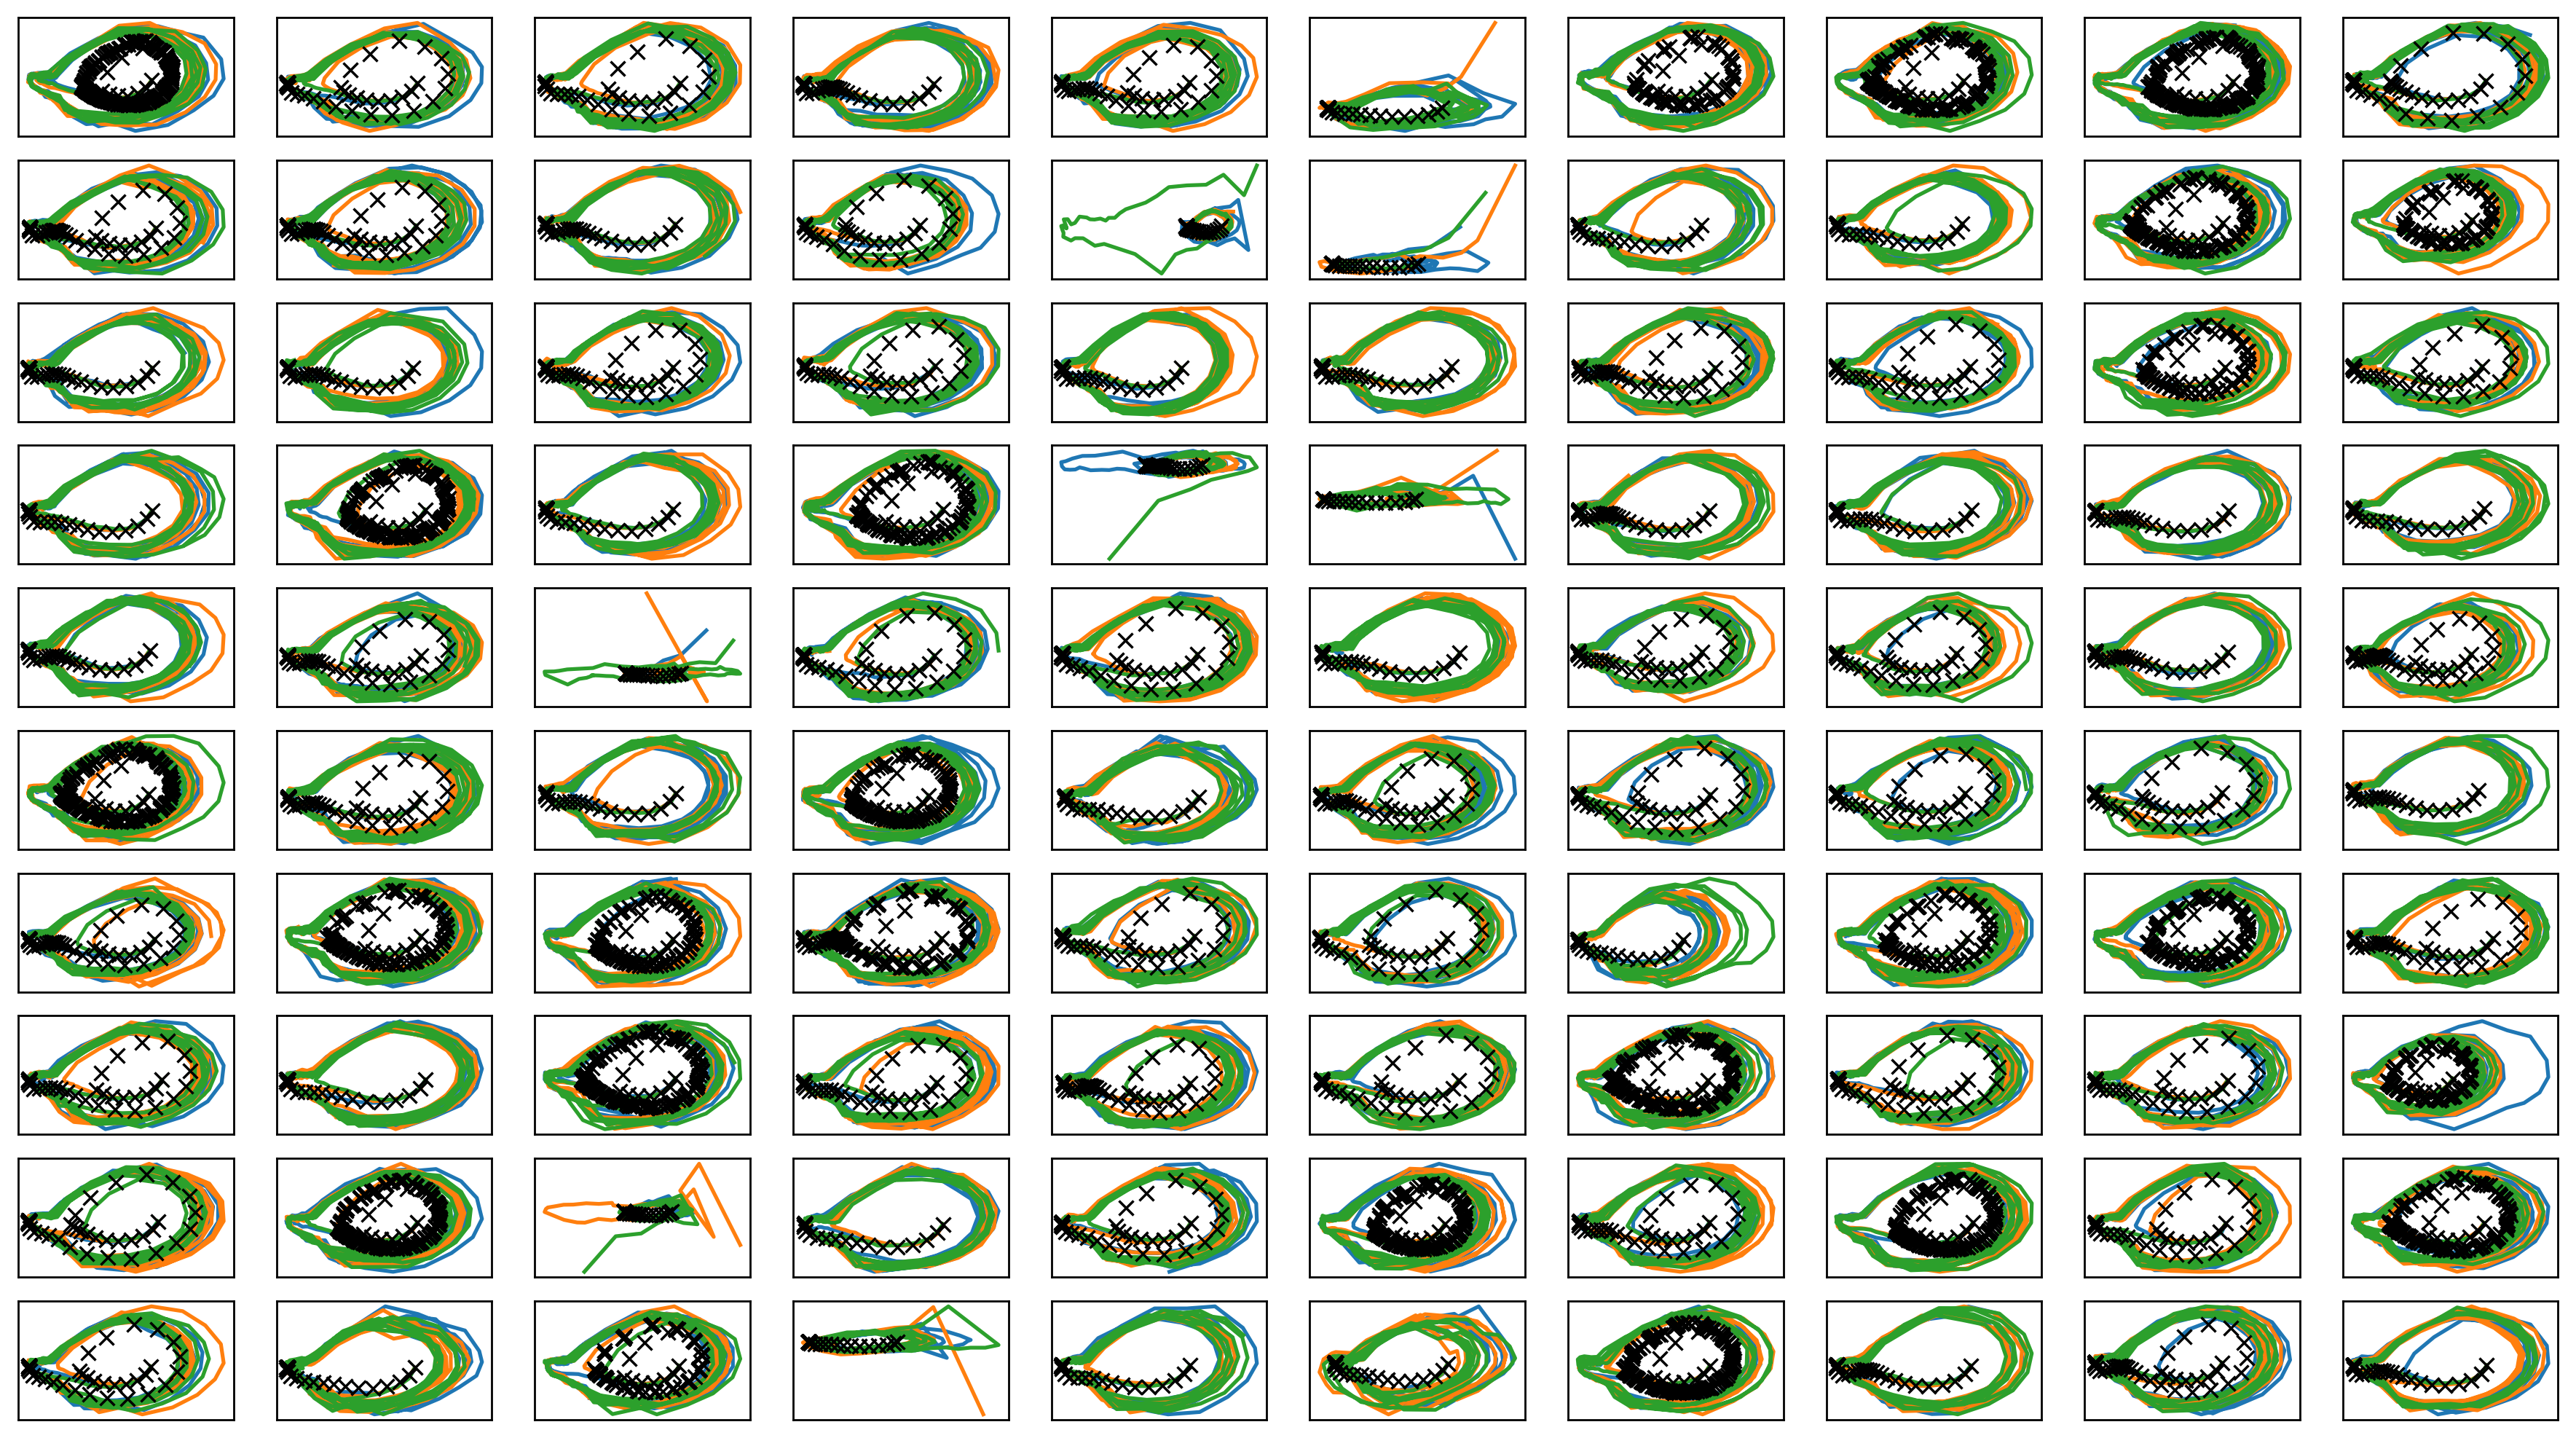

In [11]:
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("two_stage.png")
plt.savefig("two_stage.eps")
plt.savefig("two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

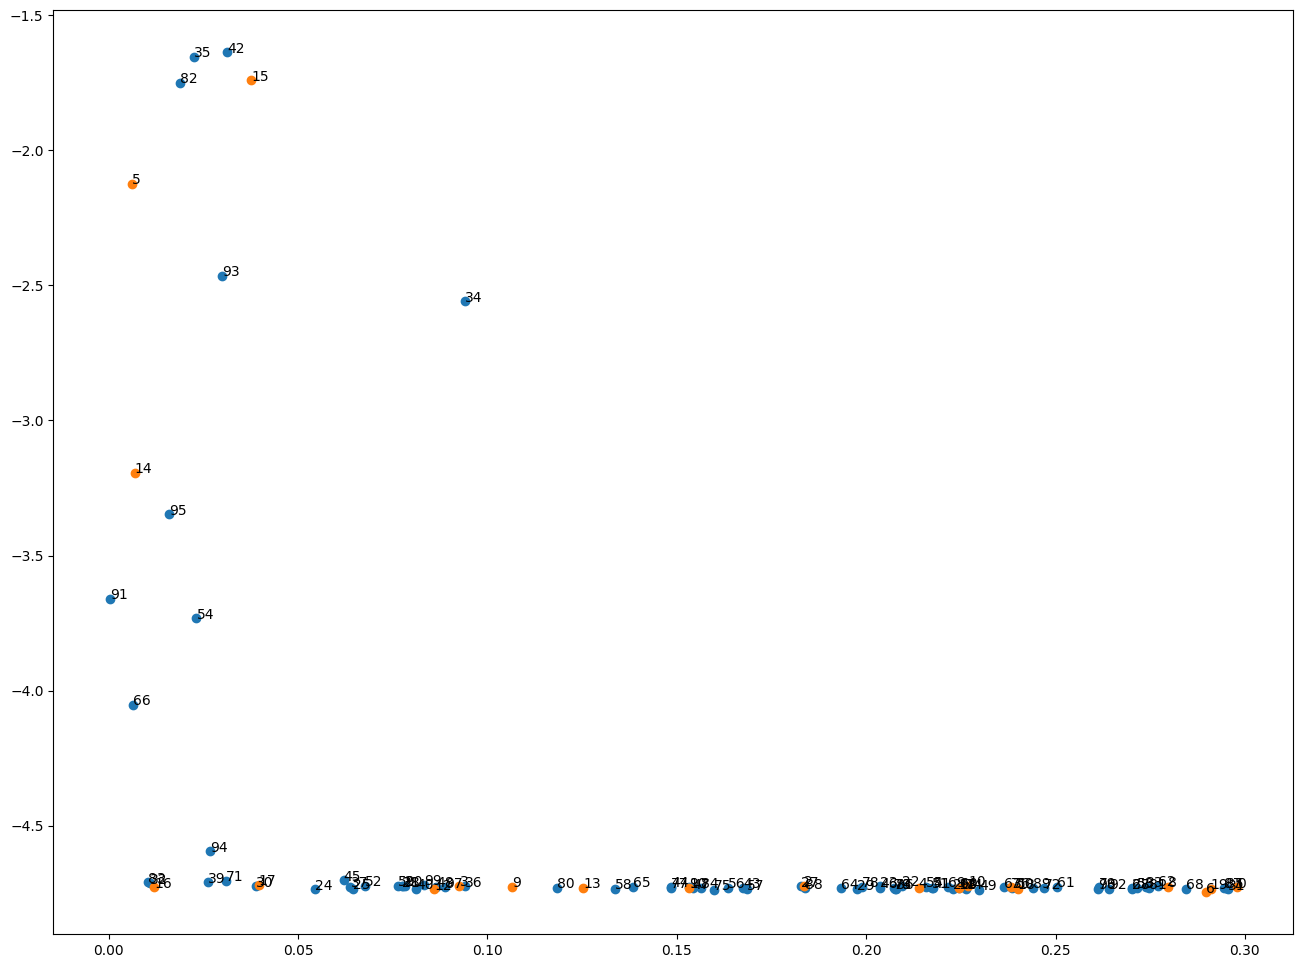

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


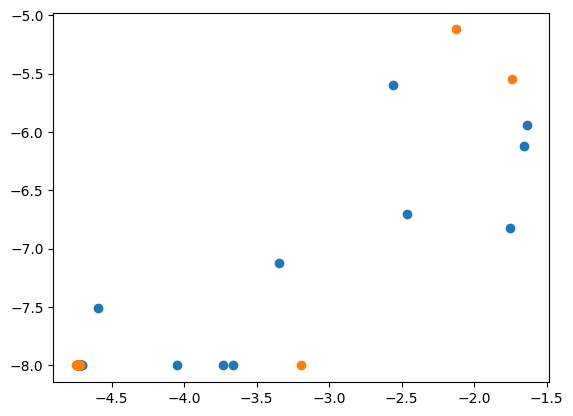

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-02-28 05:42:58.328368


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 10.76779  validloss 10.87361±0.00000  bestvalidloss 10.87361  last_update 0
train: iter 1  trainloss 9.79095  validloss 9.84106±0.00000  bestvalidloss 9.84106  last_update 0
train: iter 2  trainloss 8.95501  validloss 8.98803±0.00000  bestvalidloss 8.98803  last_update 0
train: iter 3  trainloss 8.24671  validloss 8.24302±0.00000  bestvalidloss 8.24302  last_update 0
train: iter 4  trainloss 7.61886  validloss 7.64949±0.00000  bestvalidloss 7.64949  last_update 0
train: iter 5  trainloss 7.08897  validloss 7.07058±0.00000  bestvalidloss 7.07058  last_update 0
train: iter 6  trainloss 6.63684  validloss 6.58941±0.00000  bestvalidloss 6.58941  last_update 0
train: iter 7  trainloss 6.20351  validloss 6.15838±0.00000  bestvalidloss 6.15838  last_update 0
train: iter 8  trainloss 5.83468  validloss 5.81670±0.00000  bestvalidloss 5.81670  last_update 0
train: iter 9  trainloss 5.51533  validloss 5.45912±0.00000  bestvalidloss 5.45912  last_update 0
train: iter 10  t

train: iter 87  trainloss 1.30762  validloss 1.39309±0.00000  bestvalidloss 1.39309  last_update 0
train: iter 88  trainloss 1.28019  validloss 1.38153±0.00000  bestvalidloss 1.38153  last_update 0
train: iter 89  trainloss 1.25928  validloss 1.36455±0.00000  bestvalidloss 1.36455  last_update 0
train: iter 90  trainloss 1.23219  validloss 1.34364±0.00000  bestvalidloss 1.34364  last_update 0
train: iter 91  trainloss 1.21739  validloss 1.32726±0.00000  bestvalidloss 1.32726  last_update 0
train: iter 92  trainloss 1.19721  validloss 1.30407±0.00000  bestvalidloss 1.30407  last_update 0
train: iter 93  trainloss 1.18607  validloss 1.31416±0.00000  bestvalidloss 1.30407  last_update 1
train: iter 94  trainloss 1.16946  validloss 1.32773±0.00000  bestvalidloss 1.30407  last_update 2
train: iter 95  trainloss 1.15686  validloss 1.30933±0.00000  bestvalidloss 1.30407  last_update 3
train: iter 96  trainloss 1.15535  validloss 1.30484±0.00000  bestvalidloss 1.30407  last_update 4
train: ite

train: iter 170  trainloss 1.05010  validloss 1.39857±0.00000  bestvalidloss 1.24783  last_update 47
train: iter 171  trainloss 1.05216  validloss 1.38235±0.00000  bestvalidloss 1.24783  last_update 48
train: iter 172  trainloss 1.05052  validloss 1.40371±0.00000  bestvalidloss 1.24783  last_update 49
train: iter 173  trainloss 1.03822  validloss 1.38434±0.00000  bestvalidloss 1.24783  last_update 50
train: iter 174  trainloss 1.05317  validloss 1.34023±0.00000  bestvalidloss 1.24783  last_update 51
train: iter 175  trainloss 1.06505  validloss 1.35110±0.00000  bestvalidloss 1.24783  last_update 52
train: iter 176  trainloss 1.05625  validloss 1.35573±0.00000  bestvalidloss 1.24783  last_update 53
train: iter 177  trainloss 1.04797  validloss 1.38317±0.00000  bestvalidloss 1.24783  last_update 54
train: iter 178  trainloss 1.04618  validloss 1.36104±0.00000  bestvalidloss 1.24783  last_update 55
train: iter 179  trainloss 1.05053  validloss 1.37917±0.00000  bestvalidloss 1.24783  last_

In [16]:
print(vi.initial_belief)


Parameter containing:
tensor([-4.5075, -0.7232], requires_grad=True)


In [17]:
vi.save()

In [18]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

get_belief:  [-2.1289496 -7.3217034] iter 3069 len 199 compute_time 1.17 best_loss -158 loss.item() -158
get_belief:  [-2.8611288 -6.3989305] iter 2915 len 199 compute_time 1.1 best_loss 42.6 loss.item() 44.3
get_belief:  [-4.690495 -7.499283] iter 1878 len 199 compute_time 0.707 best_loss -589 loss.item() -588


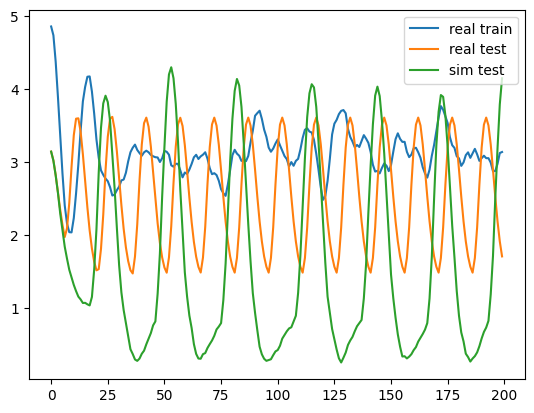

encoder [-4.7348366 -8.       ]
initial_belief tensor([-4.5075, -0.7232])
real train tensor([-2.1289, -7.3217])
real test tensor([-2.8611, -6.3989])
sim tensor([-4.6905, -7.4993])


In [19]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-4.755102040816326


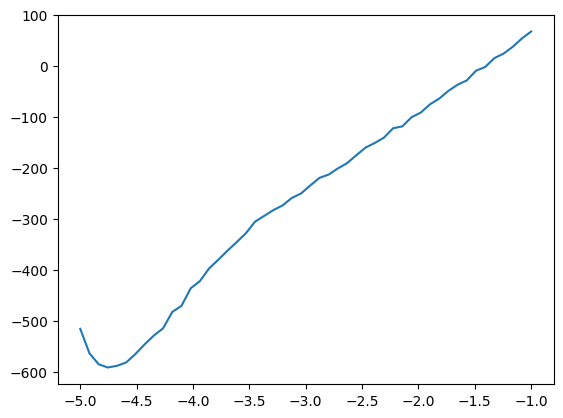

In [21]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])